In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
import numpy as np

In [8]:
import pandas as pd

In [11]:
import pandas as pd

In [12]:
import seaborn as sns

In [13]:
import matplotlib.pyplot as plt

In [14]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [15]:
print("Size of training set" + str(df_train.shape))
print("Size of test set" + str(df_test.shape))
print('\n')
print("columns in train" + str(df_train.columns.tolist()))
print("columns in test" + str(df_test.columns.tolist()))
df_train.head()

Size of training set(48120, 4)
Size of test set(11808, 3)


columns in train['DateTime', 'Junction', 'Vehicles', 'ID']
columns in test['DateTime', 'Junction', 'ID']


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [16]:
df_tmp = df_train.set_index(['Junction', 'DateTime'])

In [17]:
level_values = df_tmp.index.get_level_values

In [18]:
del df_tmp

In [19]:
train = df_train.pivot(index='DateTime',columns='Junction',values='Vehicles')
train

Junction,1,2,3,4
DateTime,,,,
2015-11-01 00:00:00,15.0,6.0,9.0,NaN
2015-11-01 01:00:00,13.0,6.0,7.0,NaN
2015-11-01 02:00:00,10.0,5.0,5.0,NaN
2015-11-01 03:00:00,7.0,6.0,1.0,NaN
2015-11-01 04:00:00,9.0,7.0,2.0,NaN
...,...,...,...,...
2017-06-30 19:00:00,105.0,34.0,33.0,11.0
2017-06-30 20:00:00,96.0,35.0,31.0,30.0
2017-06-30 21:00:00,90.0,31.0,28.0,16.0


In [20]:
train = df_train.pivot(index='DateTime', columns='Junction', values='Vehicles')
train

Junction,1,2,3,4
DateTime,,,,
2015-11-01 00:00:00,15.0,6.0,9.0,NaN
2015-11-01 01:00:00,13.0,6.0,7.0,NaN
2015-11-01 02:00:00,10.0,5.0,5.0,NaN
2015-11-01 03:00:00,7.0,6.0,1.0,NaN
2015-11-01 04:00:00,9.0,7.0,2.0,NaN
...,...,...,...,...
2017-06-30 19:00:00,105.0,34.0,33.0,11.0
2017-06-30 20:00:00,96.0,35.0,31.0,30.0
2017-06-30 21:00:00,90.0,31.0,28.0,16.0


In [21]:
train.isnull().sum()

Junction
1        0
2        0
3        0
4    10248
dtype: int64

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14592 entries, 2015-11-01 00:00:00 to 2017-06-30 23:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       14592 non-null  float64
 1   2       14592 non-null  float64
 2   3       14592 non-null  float64
 3   4       4344 non-null   float64
dtypes: float64(4)
memory usage: 570.0+ KB


In [23]:
value=round(train[4].max())/1.0
value

36.0

In [24]:
train = train.fillna(value)

In [25]:
df_train.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


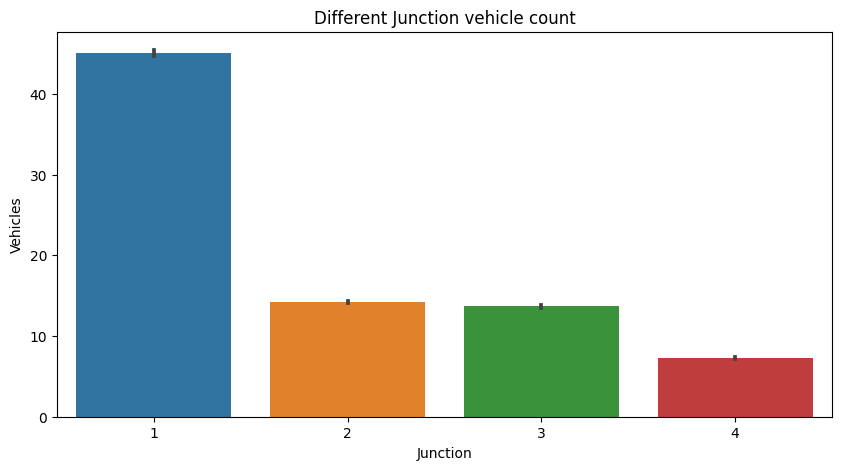

In [26]:
plt.figure(figsize=(10,5))
plt.title("Different Junction vehicle count")
sns.barplot(x=df_train["Junction"], y =df_train["Vehicles"])
plt.show()

In [27]:
def gen_lag_features(df, n_in=1,n_out=1,dropnan=True):
    n_vars = df.shape[1]
    cols, names = list(), list()
    #input sequence (t-n,.....t-1)
    for i in range(n_in,0,-1):
        cols.append(df.shift(i))
        names+=[('Junction %d (H-%d)' %(j+1, i)) for j in range(n_vars)]
    # forecast sequence (t,t+1,.....t+n)
    for i in range(0,n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names+=[('Junction %d (H)' %(j+1)) for j in range(n_vars)]
        else:
            names+=[('Junction %d (H+%d)' %(j+1,i)) for j in range(n_vars)]
    #put it all together
    agg = pd.concat(cols,axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [28]:
Xy_train= gen_lag_features(train)
Xy_train

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1),Junction 1 (H),Junction 2 (H),Junction 3 (H),Junction 4 (H)
DateTime,,,,,,,,
2015-11-01 01:00:00,15.0,6.0,9.0,36.0,13.0,6.0,7.0,36.0
2015-11-01 02:00:00,13.0,6.0,7.0,36.0,10.0,5.0,5.0,36.0
2015-11-01 03:00:00,10.0,5.0,5.0,36.0,7.0,6.0,1.0,36.0
2015-11-01 04:00:00,7.0,6.0,1.0,36.0,9.0,7.0,2.0,36.0
2015-11-01 05:00:00,9.0,7.0,2.0,36.0,6.0,2.0,2.0,36.0
...,...,...,...,...,...,...,...,...
2017-06-30 19:00:00,95.0,34.0,38.0,17.0,105.0,34.0,33.0,11.0
2017-06-30 20:00:00,105.0,34.0,33.0,11.0,96.0,35.0,31.0,30.0
2017-06-30 21:00:00,96.0,35.0,31.0,30.0,90.0,31.0,28.0,16.0


In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))
Xy_train[Xy_train.columns]= scaler.fit_transform(Xy_train[Xy_train.columns])

Xy_train

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1),Junction 1 (H),Junction 2 (H),Junction 3 (H),Junction 4 (H)
DateTime,,,,,,,,
2015-11-01 01:00:00,0.066225,0.106383,0.044693,1.000000,0.052980,0.106383,0.033520,1.000000
2015-11-01 02:00:00,0.052980,0.106383,0.033520,1.000000,0.033113,0.085106,0.022346,1.000000
2015-11-01 03:00:00,0.033113,0.085106,0.022346,1.000000,0.013245,0.106383,0.000000,1.000000
2015-11-01 04:00:00,0.013245,0.106383,0.000000,1.000000,0.026490,0.127660,0.005587,1.000000
2015-11-01 05:00:00,0.026490,0.127660,0.005587,1.000000,0.006623,0.021277,0.005587,1.000000
...,...,...,...,...,...,...,...,...
2017-06-30 19:00:00,0.596026,0.702128,0.206704,0.457143,0.662252,0.702128,0.178771,0.285714
2017-06-30 20:00:00,0.662252,0.702128,0.178771,0.285714,0.602649,0.723404,0.167598,0.828571
2017-06-30 21:00:00,0.602649,0.723404,0.167598,0.828571,0.562914,0.638298,0.150838,0.428571


In [32]:
X_train = Xy_train[Xy_train.index < '2017-04-01'].iloc[:,0:4]
X_train

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1)
DateTime,,,,
2015-11-01 01:00:00,0.066225,0.106383,0.044693,1.000000
2015-11-01 02:00:00,0.052980,0.106383,0.033520,1.000000
2015-11-01 03:00:00,0.033113,0.085106,0.022346,1.000000
2015-11-01 04:00:00,0.013245,0.106383,0.000000,1.000000
2015-11-01 05:00:00,0.026490,0.127660,0.005587,1.000000
...,...,...,...,...
2017-03-31 19:00:00,0.476821,0.574468,0.178771,0.142857
2017-03-31 20:00:00,0.496689,0.531915,0.156425,0.200000
2017-03-31 21:00:00,0.483444,0.638298,0.156425,0.200000


In [33]:
y_train= Xy_train[Xy_train.index < '2017-04-01'].iloc[:,4:]
y_train

,Junction 1 (H),Junction 2 (H),Junction 3 (H),Junction 4 (H)
DateTime,,,,
2015-11-01 01:00:00,0.052980,0.106383,0.033520,1.000000
2015-11-01 02:00:00,0.033113,0.085106,0.022346,1.000000
2015-11-01 03:00:00,0.013245,0.106383,0.000000,1.000000
2015-11-01 04:00:00,0.026490,0.127660,0.005587,1.000000
2015-11-01 05:00:00,0.006623,0.021277,0.005587,1.000000
...,...,...,...,...
2017-03-31 19:00:00,0.496689,0.531915,0.156425,0.200000
2017-03-31 20:00:00,0.483444,0.638298,0.156425,0.200000
2017-03-31 21:00:00,0.403974,0.574468,0.150838,0.228571


In [34]:
print(X_train.shape, y_train.shape)

(12407, 4) (12407, 4)


In [35]:
X_train = np.expand_dims(X_train.values,axis=2)
print(X_train.shape)

y_train= y_train.values
print(y_train.shape)

(12407, 4, 1)
(12407, 4)


In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.initializers import he_normal
import keras.backend as K

def root_mean_squared_error(y_true,y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [37]:
regressor= Sequential()
regressor.add(LSTM(units = 50,activation='relu',kernel_initializer= he_normal(seed=0),input_shape=(None,1)))
regressor.add(Dense(units=4))
regressor.compile(optimizer='adam',loss= root_mean_squared_error)

In [38]:
regressor.fit(X_train,y_train,batch_size=120,epochs=100,verbose=1)

Epoch 1/100
104/104 [==============================] - 1s 3ms/step - loss: 0.1371
Epoch 2/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0403
Epoch 3/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0370
Epoch 4/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0356
Epoch 5/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0343
Epoch 6/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0335
Epoch 7/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0330
Epoch 8/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0329
Epoch 9/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0326
Epoch 10/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0326
Epoch 11/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0325
Epoch 12/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0324
Epoch 13/100


In [39]:
X_valid = Xy_train[Xy_train.index >='2017-04-01'].iloc[:,0:4]
X_valid

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1)
DateTime,,,,
2017-04-01 00:00:00,0.417219,0.553191,0.162011,0.142857
2017-04-01 01:00:00,0.384106,0.510638,0.122905,0.142857
2017-04-01 02:00:00,0.317881,0.574468,0.078212,0.114286
2017-04-01 03:00:00,0.238411,0.361702,0.083799,0.085714
2017-04-01 04:00:00,0.225166,0.361702,0.055866,0.085714
...,...,...,...,...
2017-06-30 19:00:00,0.596026,0.702128,0.206704,0.457143
2017-06-30 20:00:00,0.662252,0.702128,0.178771,0.285714
2017-06-30 21:00:00,0.602649,0.723404,0.167598,0.828571


In [40]:
X_valid=np.expand_dims(X_valid.values,axis=2)
y_pred= regressor.predict(X_valid) 

69/69 [==============================] - 0s 1ms/step


In [41]:
y_pred = scaler.inverse_transform(np.concatenate((X_valid.squeeze(), y_pred),axis=1))[:,4:]
y_pred

array([[68.25338894, 25.47123492, 25.83770934,  6.96827798],
       [62.71639004, 23.36922431, 19.67791927,  6.29830582],
       [49.05876574, 24.11495486, 11.78046349,  3.53045678],
       ...,
       [92.80415899, 28.7826038 , 24.49255931, 27.64410114],
       [86.70750785, 28.62309945, 24.04380877, 11.86675614],
       [83.18113577, 25.36012506, 20.7876687 , 17.90062985]])

In [42]:
y_truth= train[train.index >= '2017-04-01']
y_truth

Junction,1,2,3,4
DateTime,,,,
2017-04-01 00:00:00,63.0,25.0,23.0,6.0
2017-04-01 01:00:00,53.0,28.0,15.0,5.0
2017-04-01 02:00:00,41.0,18.0,16.0,4.0
2017-04-01 03:00:00,39.0,18.0,11.0,4.0
2017-04-01 04:00:00,31.0,15.0,10.0,1.0
...,...,...,...,...
2017-06-30 19:00:00,105.0,34.0,33.0,11.0
2017-06-30 20:00:00,96.0,35.0,31.0,30.0
2017-06-30 21:00:00,90.0,31.0,28.0,16.0


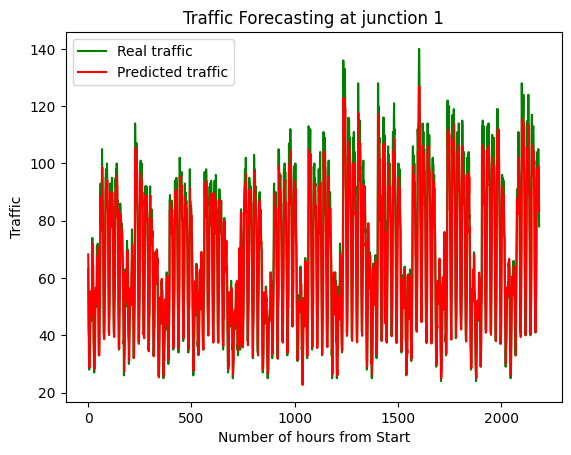

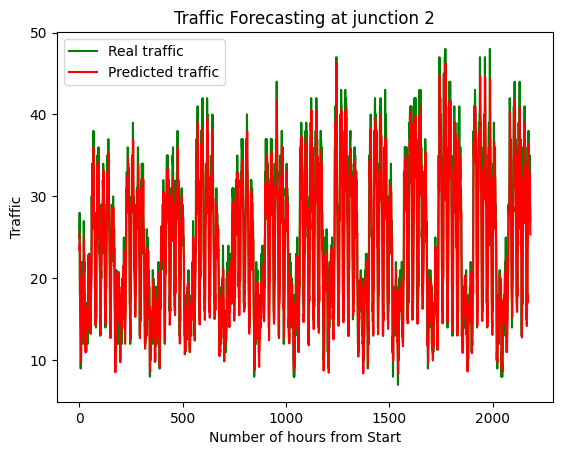

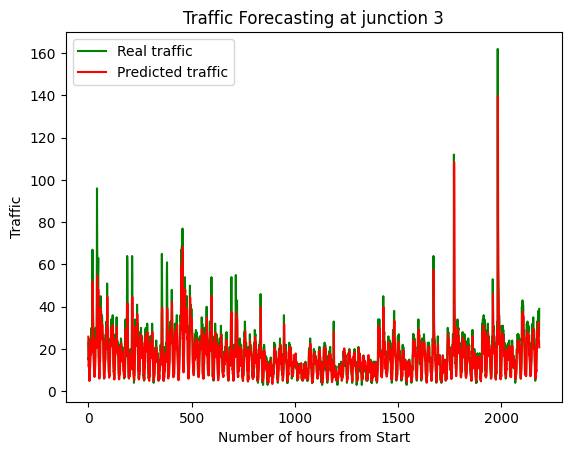

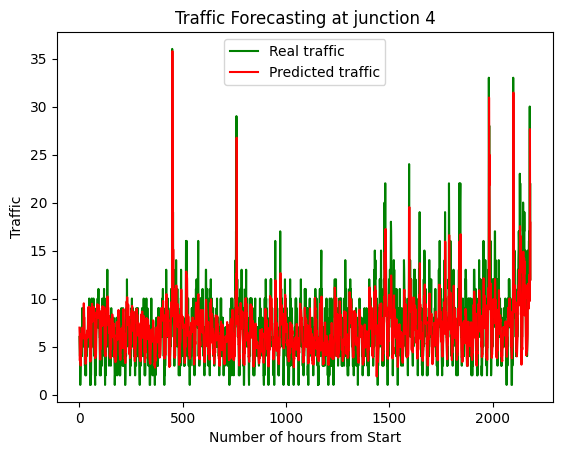

In [43]:
# Visualising Result for the junctions
for junction in range(4):
    plt.figure
    plt.plot(y_truth.values[:,junction],color='green', label='Real traffic')
    plt.plot(y_pred[:,junction],color='red',label ='Predicted traffic')
    plt.title('Traffic Forecasting at junction %i' % (junction+1))
    plt.xlabel('Number of hours from Start')
    plt.ylabel('Traffic')
    plt.legend()
    plt.show()

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(y_true,y_pred):
       return sqrt(mean_squared_error(y_true, y_pred))

In [45]:
rmse(y_truth,y_pred)

5.935527070771216

In [46]:
import pandas as pd
import numpy as np
trdf = pd.read_csv("train.csv")
trainMat= trdf.to_numpy()
tedf = pd.read_csv("test.csv")
testMat=tedf.to_numpy()
train=[]
target=[]
print(trainMat)
for i in trainMat:
    s=i[3]
    year=s/(10**7)
    s=s%(10**7)
    month=s/(10**5)
    s=s%(10**5)
    date=s/(10**3)
    s=s%(10**3)
    time=s/(10)
    s=s%(10)
    junction =s
    train.append([year,month,date,time,junction])
    target.append(i[2])
X= np.array(train)
y=np.array(target)

[['2015-11-01 00:00:00' 1 15 20151101001]
 ['2015-11-01 01:00:00' 1 13 20151101011]
 ['2015-11-01 02:00:00' 1 10 20151101021]
 ...
 ['2017-06-30 21:00:00' 4 16 20170630214]
 ['2017-06-30 22:00:00' 4 22 20170630224]
 ['2017-06-30 23:00:00' 4 12 20170630234]]


In [47]:
jun1=[]
jun2=[]
jun3=[]
jun4=[]
jun5=[]
jun=[jun1,jun2,jun3,jun4,jun5]
for i in range(0,len(train),24):
    ct=0
    for j in range(24):
        ct+=target[i+j]
    jun[train[i][4]-1].append(ct)
jun[3]=[0]*(len(jun[0])-len(jun[3]))+jun[3]
print(len(jun[0]),len(jun[1]),len(jun[2]),len(jun[3]))

k=7
week=[[] for i in range(k)]
for i in range(len(jun[1])):
    week[i%k].append(jun[1][i])
for i in range(k):
    print(np.mean(week[i]))
hour=[[] for i in range(24)]
for i in range(len(jun[0])*24+len(jun[1])*24, len(jun[0])*24+len(jun[1])*24+len(jun[2])*24):
    hour[i%24].append(target[i])
for i in range(24):
    print(np.mean(hour[i]))

temp=[-i for i in jun[3]]
jun[4]=np.add(jun[2],temp)

608 608 608 608
243.45977011494253
365.4942528735632
397.367816091954
394.0
384.632183908046
358.62068965517244
249.90697674418604
14.174342105263158
9.856907894736842
8.055921052631579
6.776315789473684
5.978618421052632
5.685855263157895
6.2368421052631575
7.550986842105263
9.057565789473685
11.429276315789474
15.004934210526315
17.1875
17.707236842105264
16.049342105263158
17.57236842105263
17.37171052631579
16.88157894736842
16.901315789473685
17.929276315789473
19.129934210526315
20.200657894736842
18.72203947368421
17.394736842105264
15.800986842105264


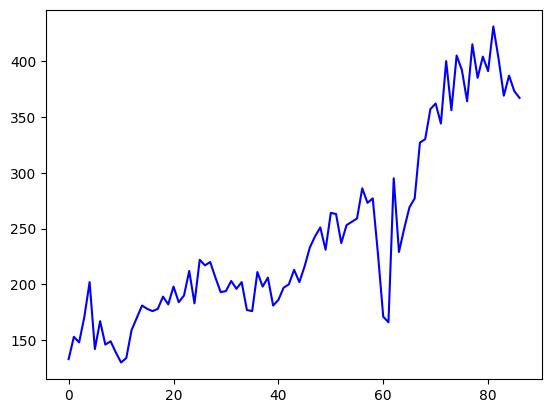

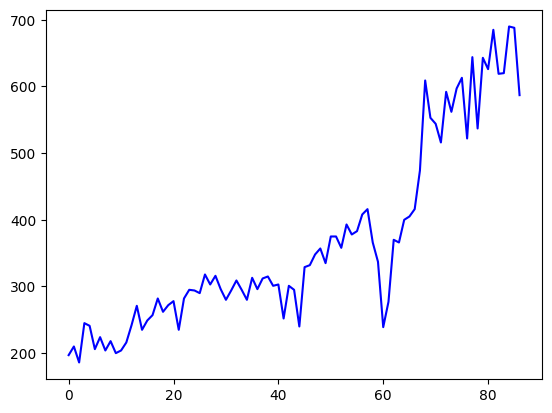

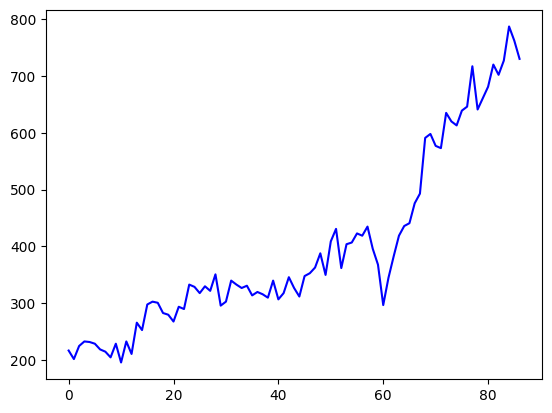

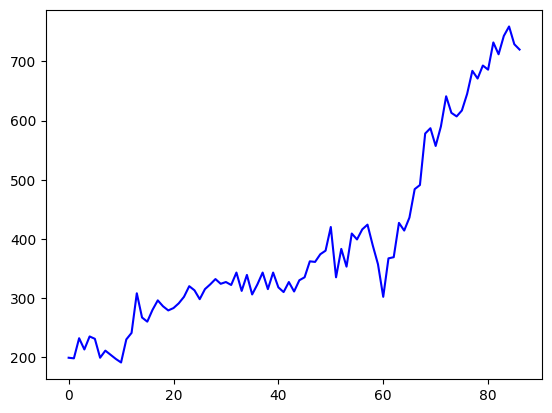

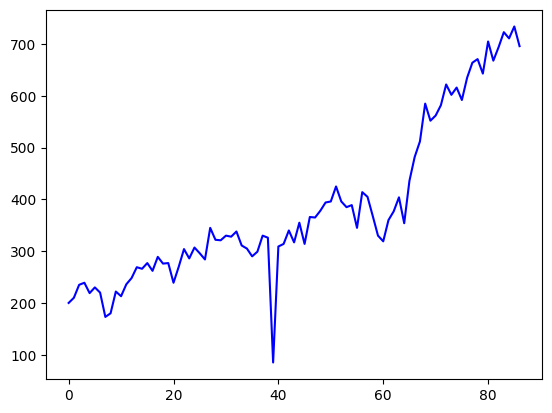

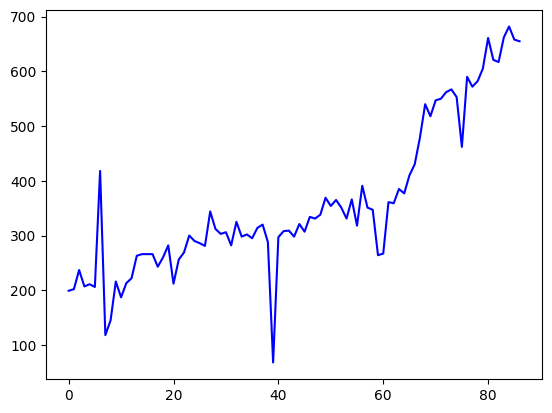

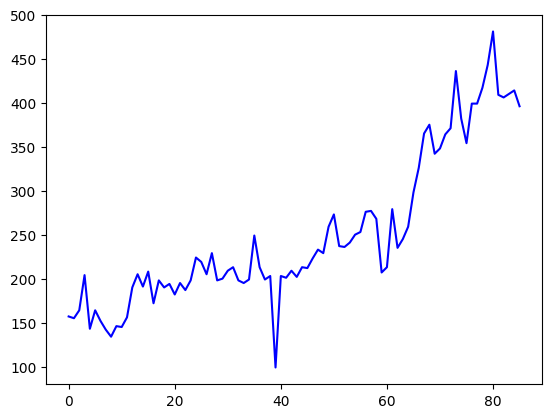

In [48]:
import matplotlib.pyplot as plt
for i in range(len(week)):
    plt.plot(week[i],'blue')
    plt.show()

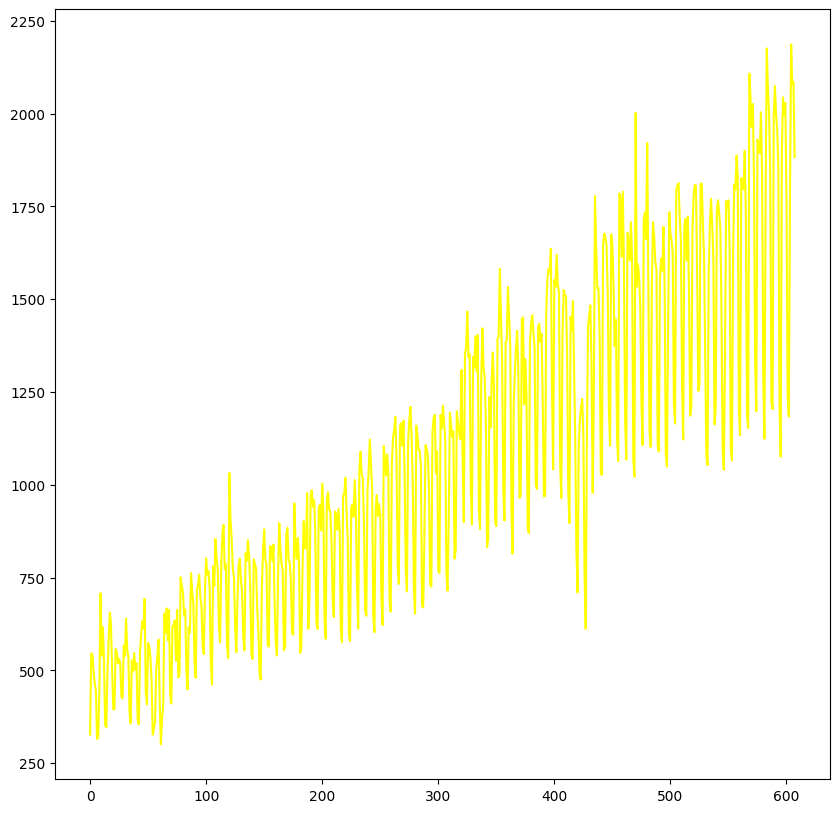

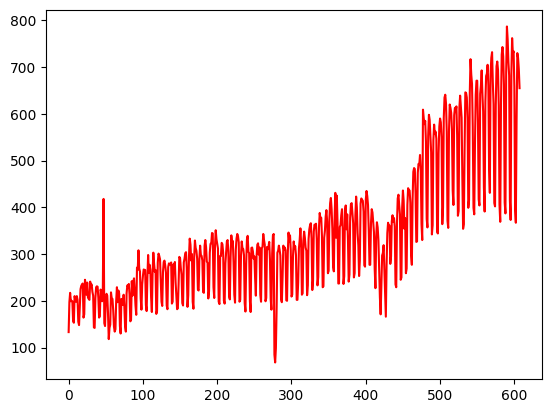

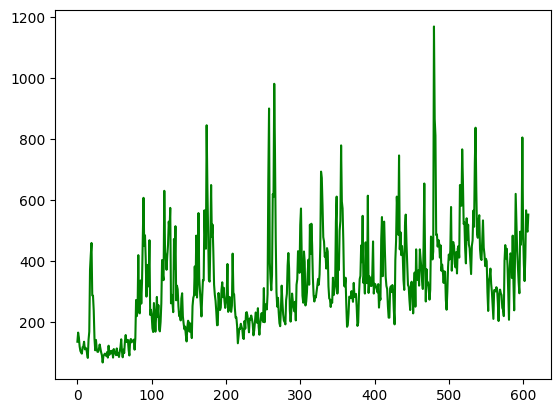

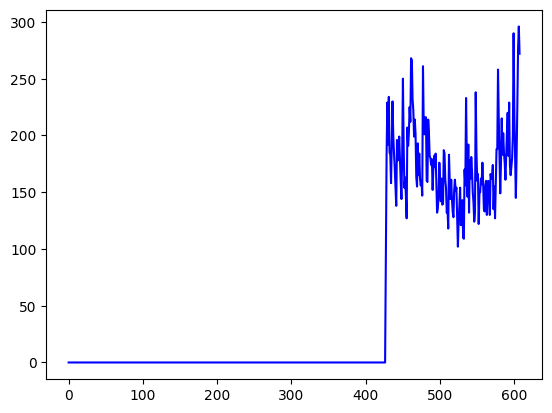

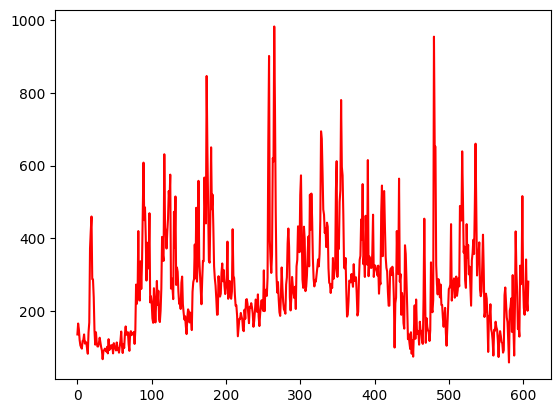

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(jun[0],'yellow')
plt.show()
plt.plot(jun[1],'red')
plt.show()
plt.plot(jun[2],'green')
plt.show()
plt.plot(jun[3],'blue')
plt.show()
plt.plot(jun[4],'red')
plt.show()

In [50]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=7)
from sklearn.ensemble import RandomForestClassifier
clfl=RandomForestClassifier(criterion='entropy',min_samples_split=100,min_samples_leaf=10,max_depth=12)
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [51]:
clfl.fit(X,y)
pred = clfl.predict(X)
val1=(accuracy_score(y,pred)*100)
print("Accuracy Score for Random Forest :",val1*5)

Accuracy Score for Random Forest : 103.99002493765586


In [52]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X,y)
predictions = DT.predict(X)
val2= (accuracy_score(y,pred)*100)
print("Accuracy score for Decision tree classifer : ",val2*5)

Accuracy score for Decision tree classifer :  103.99002493765586


In [53]:
from sklearn.svm import SVC 
SVM = SVC(kernel='linear')
SVM.fit(X,y)
predictions = SVM.predict(X)
val3= (accuracy_score(y,pred)*100)
print("Accuracy score for SVM : ",val3*5)

Accuracy score for SVM :  103.99002493765586


In [58]:
pip install xgboost

                                              0.0/70.9 MB ? eta -:--:--
                                              0.1/70.9 MB 1.7 MB/s eta 0:00:43
                                              0.1/70.9 MB 2.1 MB/s eta 0:00:33
                                              0.3/70.9 MB 2.5 MB/s eta 0:00:28
                                              0.4/70.9 MB 2.3 MB/s eta 0:00:31
                                              0.5/70.9 MB 2.6 MB/s eta 0:00:27
                                              0.6/70.9 MB 2.5 MB/s eta 0:00:28
                                              0.8/70.9 MB 2.5 MB/s eta 0:00:28
                                              0.9/70.9 MB 2.5 MB/s eta 0:00:28
                                              1.0/70.9 MB 2.4 MB/s eta 0:00:29
                                              1.1/70.9 MB 2.4 MB/s eta 0:00:30
                                              1.2/70.9 MB 2.5 MB/s eta 0:00:29
                                              1.3/70.9 MB 2


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


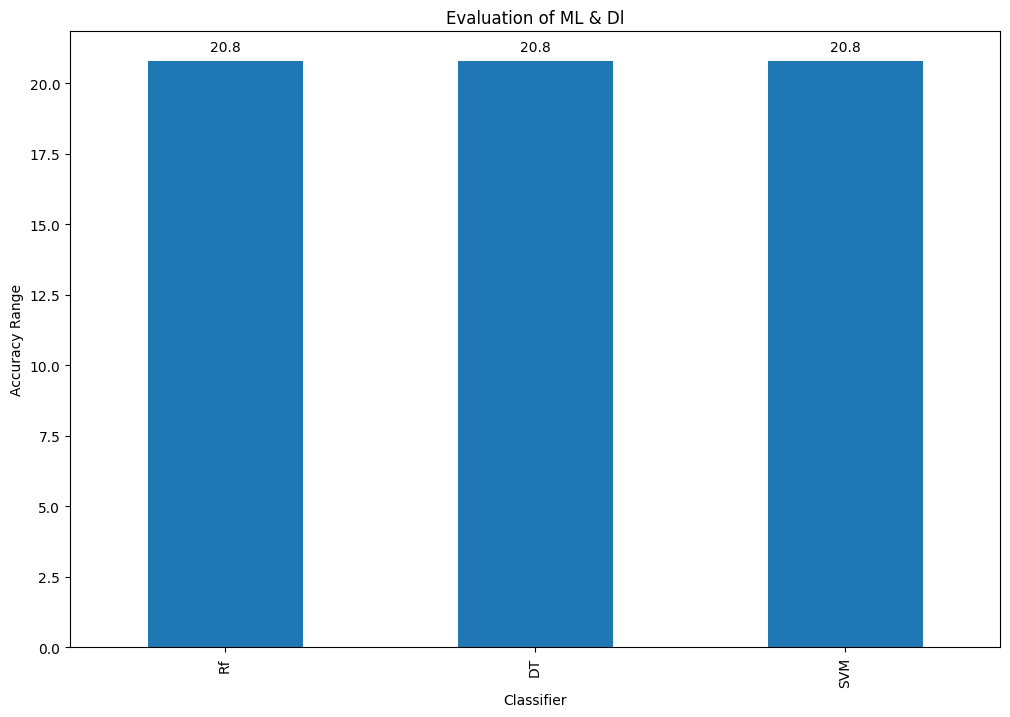

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


frequencies =[val1,val2,val3]
freq_series = pd.Series(frequencies)

x_labels = ['Rf','DT','SVM']

#plot the figure
plt.figure(figsize=(12,8))
ax= freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML & Dl')
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)

def add_value_labels(ax,spacing=5):
    #for each bar: Place a label
    for rect in ax.patches:
        y_value= rect.get_height()
        x_value= rect.get_x() + rect.get_width()/2
        space=spacing
        va='bottom'
        if y_value<0:     
            space*=-1
            va='top'
        label ="{:.1f}".format(y_value)
    
    #create annotation
        ax.annotate(label,
                    (x_value,y_value),
                   xytext=(0,space),
                   textcoords="offset points",
                   ha='center',
                   va=va)

add_value_labels(ax)
plt.show()